In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = '/content/Sample - Superstore.csv'
df = pd.read_csv(file_path, encoding='windows-1252')
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
print("Количкество пропусков:", df.isna().sum().sum())
print("Количество дубликатов:", df.duplicated().sum())

Количкество пропусков: 0
Количество дубликатов: 0


Таким образом, нет необходимости в обработке данных.

In [6]:
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [39]:
df['Profit_per_one'] = df['Profit']/df['Quantity']
df['Margin'] = (df['Profit']/df['Sales'])*100
df.groupby('Category').agg(Средняя_прибыльность = ('Profit_per_one','mean'), Маржинальность_проценты = ('Margin', 'mean')).sort_values(by = 'Средняя_прибыльность', ascending = False)

,Средняя_прибыльность,Маржинальность_проценты
Category,,
Technology,20.993948,15.613805
Office Supplies,5.819061,13.803029
Furniture,1.935615,3.878353


В среднем самой прибыльной категорией за единицу товара является "технологии". В том числе она соответсвует наибольшей маржинальности.

In [38]:
df.groupby('Region').agg(Средняя_прибыльность = ('Profit_per_one','mean'), Маржинальность_проценты = ('Margin', 'mean')).sort_values(by = 'Средняя_прибыльность', ascending = False)

,Средняя_прибыльность,Маржинальность_проценты
Region,,
West,9.182679,21.948662
East,8.642622,16.722696
South,8.224975,16.351903
Central,4.561411,-10.407294


В среднем самым прибыльным регионом за единицу товара является Запад. В том числе он соответсвует наибольшей маржинальности.

In [8]:
X = df.loc[df['Discount'] != 0]
Y = df.loc[df['Discount'] == 0]

X1 = X.groupby('Product ID').agg(Купили = ('Quantity','sum'), Вся_выручка= ('Sales','sum'))
Y1 = Y.groupby('Product ID').agg(Купили_без_скидки = ('Quantity','sum'), Вся_выручка_без_скидки = ('Sales','sum'))

Join = pd.concat([X1,Y1], axis=1)
Join.dropna(inplace=True)
print('Всего наименований:' ,Join.shape[0])
print('Для которых выполняется гипотеза:', Join.loc[(Join['Вся_выручка']> Join['Вся_выручка_без_скидки']), ['Купили', 'Купили_без_скидки', 'Вся_выручка', 'Вся_выручка_без_скидки']].shape[0])


Всего наименований: 1440
Для которых выполняется гипотеза 560


Соответсвенно можно сделать вывод: гипотеза о том, что скидка способствует повышению выруки выполняется для 560 наименований из 1440

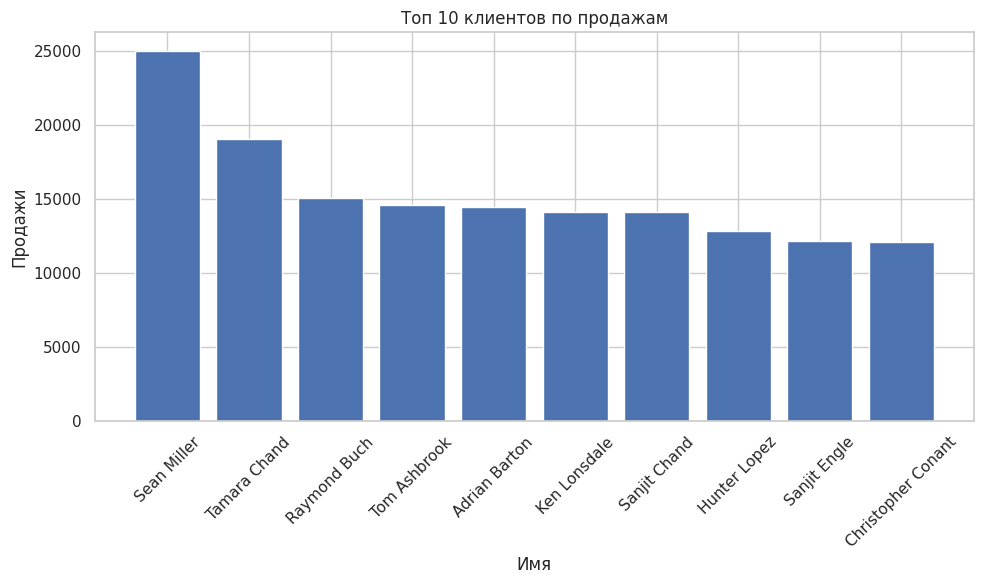

In [118]:
fig = df.groupby(['Customer ID', 'Customer Name']).agg({'Sales':'sum'}).sort_values(by = 'Sales', ascending = False).head(10).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(fig['Customer Name'], fig['Sales'])


plt.title("Топ 10 клиентов по продажам")
plt.xlabel("Имя")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Таким образом, Sean Miller - клиент, с которым проведено сделок на наибольшую сумму.

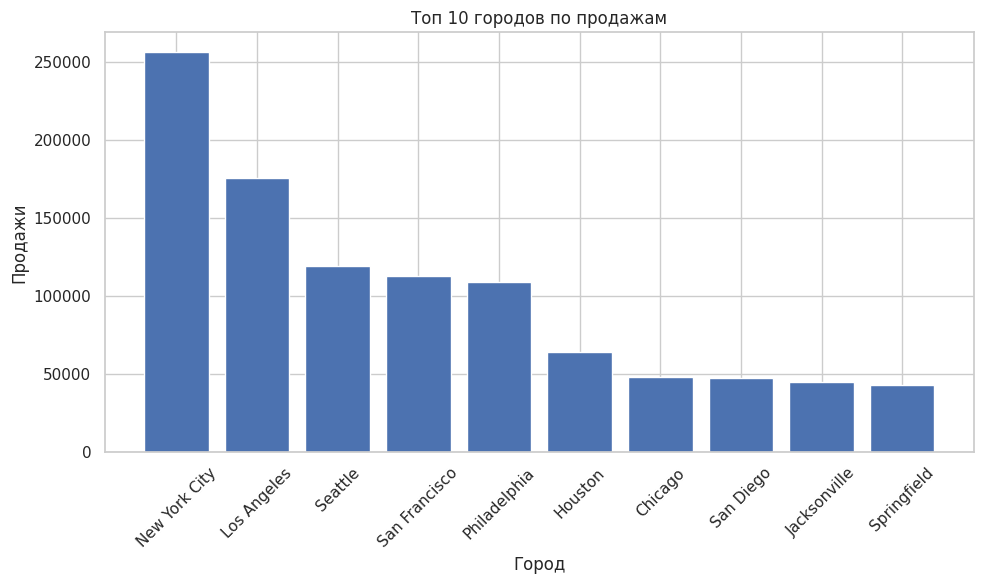

In [120]:
fig = df.groupby('City').agg({'Sales':'sum'}).sort_values(by = 'Sales', ascending = False).head(10).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(fig['City'], fig['Sales'])


plt.title("Топ 10 городов по продажам")
plt.xlabel("Город")
plt.ylabel("Продажи")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Таким образом, New York - город для которого были проведены сделки на наибольшую сумму.